In [1]:
import numpy as np

In [27]:

import sys
sys.path.append('/media/Data/clearmap/ClearMap2')

#load ClearMap modules
from ClearMap.Environment import *  #analysis:ignore

OS: linux, library variable name: LD_LIBRARY_PATH
Variable LD_LIBRARY_PATH exists, patching with /home/poliakov/anaconda3/envs/ClearMap/lib/python3.7/site-packages/cv2/../../../../lib:
Elastix successfully initialized from path: /media/Data/clearmap/ClearMap2/ClearMap/External/elastix/build


In [41]:
directory = '/media/Data/clearmap/ClearMap2/ClearMap/Tests/Data/TubeMap_Example'   #where the project data is located, and where the results will be written

resources_directory = settings.resources_path

expression_raw      = 'Raw/14-16-41_tricocktail_UltraII[<Y,2> x <X,2>]_C00_UltraII Filter0001.ome.npy'         
expression_arteries = 'Raw/14-16-41_tricocktail_UltraII[<Y,2> x <X,2>]_C00_UltraII Filter0001.ome.npy'       
expression_auto     = 'Autofluorescence/14-02-13_auto_UltraII_C00_xyz-Table Z<Z,4>.ome.tif'  

In [42]:
ws = wsp.Workspace('TubeMap', directory=directory) #make a workspace 
ws.update(raw=expression_raw, arteries=expression_arteries, autofluorescence=expression_auto)
ws.info()

Workspace[TubeMap]{/media/Data/clearmap/ClearMap2/ClearMap/Tests/Data/TubeMap_Example}
              raw: Raw/14-16-41_tricocktail_UltraII[<Y,2> x <X,2>]_C00_UltraII Filter0001.ome.npy {71 files, ('Y', 'X'): (0, 0) -> (5, 11)}
                   Raw/14-16-41_tricocktail_UltraII[<Y,2> x <X,2>]_C00_UltraII Filter0001.ome.tif {71 files, ('Y', 'X'): (0, 0) -> (5, 11)}
 autofluorescence: Autofluorescence/14-02-13_auto_UltraII_C00_xyz-Table Z<Z,4>.ome.tif {899 files, ('Z',): (0,) -> (898,)}
         stitched: no file
           layout: layout_aligned_axis.lyt
       background: no file
        resampled: no file
resampled_to_auto: no file
auto_to_reference: no file
         arteries: Raw/14-16-41_tricocktail_UltraII[<Y,2> x <X,2>]_C00_UltraII Filter0001.ome.npy {71 files, ('Y', 'X'): (0, 0) -> (5, 11)}
                   Raw/14-16-41_tricocktail_UltraII[<Y,2> x <X,2>]_C00_UltraII Filter0001.ome.tif {71 files, ('Y', 'X'): (0, 0) -> (5, 11)}
           binary: no file
    binary_status: no fil

In [62]:
print(ws.file_list('raw')[0])
print(ws.file_list('autofluorescence')[0])

/media/Data/clearmap/ClearMap2/ClearMap/Tests/Data/TubeMap_Example/Raw/14-16-41_tricocktail_UltraII[00 x 00]_C00_UltraII Filter0001.ome.npy
/media/Data/clearmap/ClearMap2/ClearMap/Tests/Data/TubeMap_Example/Autofluorescence/14-02-13_auto_UltraII_C00_xyz-Table Z0000.ome.tif


In [71]:
expression_stack = '../Tests/Data/TubeMap_Example/Raw/14-16-41_tricocktail_UltraII[04 x 10]_C00_UltraII Filter0001.ome.npy'
# expression_stack = ws.file_list('raw')[0]

# auto_stack = '../Tests/Data/TubeMap_Example/Autofluorescence/14-16-41_tricocktail_UltraII[04 x 10]_C00_UltraII Filter0001.ome.npy'
auto_stack = ws.file_list('autofluorescence')[0]


expression_stack_plot = np.load(expression_stack)
# auto_stack_plot = np.load(auto_stack)


In [67]:

from PIL import Image
im = Image.open(auto_stack) #open tif file
auto_stack_plot = np.array(im) #turn tif file into array

In [70]:
expression_stack_plot.shape

(404, 1304, 3369)

In [68]:
auto_stack_plot.shape

(2304, 1324)

In [69]:
print(auto_stack_plot)

[[100 103 103 ... 109 101 101]
 [ 94  97 103 ...  99 103 100]
 [100 105 102 ...  95 105  92]
 ...
 [ 95  97 103 ...  97 102 105]
 [ 98  99 109 ...  95  93  92]
 [ 98 100 103 ... 103  98 101]]


In [5]:
print(type(expression_stack_plot))

<class 'numpy.ndarray'>


In [7]:
expression_stack_plot.size

1774843104

In [8]:
expression_stack_plot.shape

(404, 1304, 3369)

In [48]:
expression_stack_plot[100:200,:,:].shape

(100, 1304, 3369)

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:

# Create a figure
fig = plt.figure()


<Figure size 640x480 with 0 Axes>

In [12]:
# Create a 3D axis for plotting
ax = fig.add_subplot(111, projection='3d')


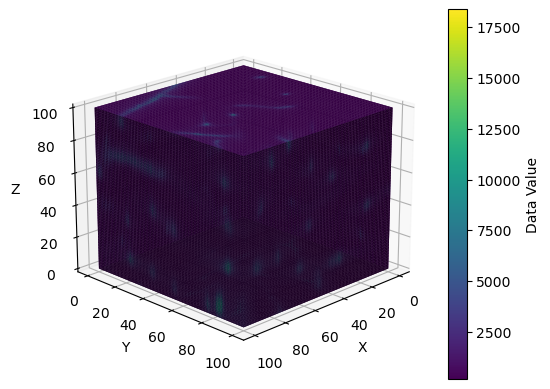

In [72]:
#create a subset
stack_subset = expression_stack_plot[303:403, 675:775, 2000:2100]

# Create a figure
fig = plt.figure()

# Create a 3D axis for plotting
ax = fig.add_subplot(111, projection='3d')

# Create a colormap using Matplotlib's "viridis" colormap
cmap = plt.get_cmap('viridis')

# Normalize your data for colormap mapping
stack_subset_min = stack_subset.min()
stack_subset_max = stack_subset.max()
norm = plt.Normalize(stack_subset_min, stack_subset_max)

# Map the data values to colors using the colormap
colors = cmap(norm(stack_subset))

# Plot the 3D data with colors
ax.voxels(stack_subset, facecolors=colors, shade=True)

# Customize the plot as needed
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20, azim=45)

# Create a colorbar for reference
mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array([])
cbar = plt.colorbar(mappable, ax=ax, label='Data Value')

# Display the 3D plot
plt.show()


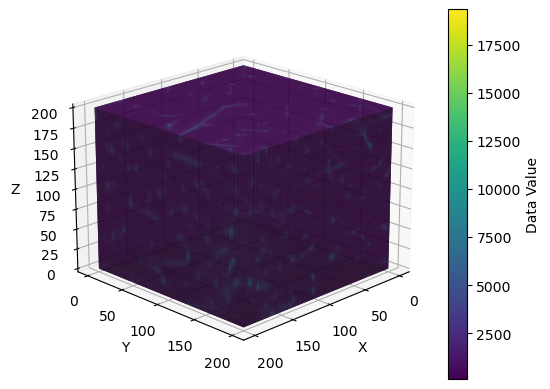

In [77]:
#create a subset
stack_subset2 = expression_stack_plot[203:403, 575:775, 1900:2100]

# Create a figure
fig = plt.figure()

# Create a 3D axis for plotting
ax = fig.add_subplot(111, projection='3d')

# Create a colormap using Matplotlib's "viridis" colormap
cmap = plt.get_cmap('viridis')

# Normalize your data for colormap mapping
stack_subset_min2 = stack_subset2.min()
stack_subset_max2 = stack_subset2.max()
norm = plt.Normalize(stack_subset_min2, stack_subset_max2)

# Map the data values to colors using the colormap
colors = cmap(norm(stack_subset2))

# Plot the 3D data with colors
ax.voxels(stack_subset2, facecolors=colors, shade=True)

# Customize the plot as needed
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20, azim=45)

# Create a colorbar for reference
mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array([])
cbar = plt.colorbar(mappable, ax=ax, label='Data Value')

# Display the 3D plot
plt.show()


In [78]:


# Create a figure
fig = plt.figure()

# Create a 3D axis for plotting
ax = fig.add_subplot(111, projection='3d')

# Create a colormap using Matplotlib's "viridis" colormap
cmap = plt.get_cmap('viridis')

# Normalize your data for colormap mapping
expression_stack_plot_min = expression_stack_plot.min()
expression_stack_plot_max = expression_stack_plot.max()
norm = plt.Normalize(expression_stack_plot_min, expression_stack_plot_max)

# Map the data values to colors using the colormap
colors = cmap(norm(expression_stack_plot))

# Plot the 3D data with colors
ax.voxels(expression_stack_plot, facecolors=colors, shade=True)

# Customize the plot as needed
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20, azim=45)

# Create a colorbar for reference
mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array([])
cbar = plt.colorbar(mappable, ax=ax, label='Data Value')

# Display the 3D plot
plt.show()


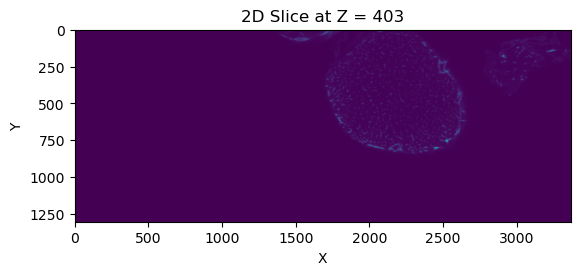

In [25]:
# Choose the z-index for the 2D slice
z_index = 403


# Extract the 2D slice
slice_2d = expression_stack_plot[z_index, :, :]

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()

# Display the 2D slice
ax.imshow(slice_2d, cmap='viridis')

# Customize the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Slice at Z = {}'.format(z_index))

# Show the plot
plt.show()


In [73]:
print(slice_2d)

[[103  97  99 ... 121 135 137]
 [105 100  99 ... 122 135 131]
 [ 99 104 100 ... 138 135 129]
 ...
 [103  95 107 ... 114 107 112]
 [102 102 100 ... 109 109 101]
 [103 101 109 ... 122 111 116]]


In [43]:
ws.filename('raw')

'/media/Data/clearmap/ClearMap2/ClearMap/Tests/Data/TubeMap_Example/Raw/14-16-41_tricocktail_UltraII[<Y,2> x <X,2>]_C00_UltraII Filter0001.ome.npy'

In [46]:
filename = ws.file_list('raw')[0]
# p3d.plot(filename)
p3d.plot(ws.file_list('raw')[0:2])

AttributeError: module 'pyqtgraph.colormap' has no attribute 'listMaps'

In [35]:
directory = '/media/Data/clearmap/ClearMap2/ClearMap/Tests/Data/TubeMap_Example'   
ws = wsp.Workspace('TubeMap', directory=directory) #make a workspace

#TP: to tedst a stack
ws.update(stack=expression_stack)
ws.info()

Workspace[TubeMap]{/media/Data/clearmap/ClearMap2/ClearMap/Tests/Data/TubeMap_Example}
              raw: no file
 autofluorescence: no file
         stitched: no file
           layout: layout_aligned_axis.lyt
       background: no file
        resampled: no file
resampled_to_auto: no file
auto_to_reference: no file
         arteries: no file
           binary: no file
    binary_status: no file
         skeleton: no file
            graph: no file
          density: no file
            stack: no file



In [ ]:
#TP: to tedst a stack
ws.update(stack=expression_stack)
ws.info()

In [37]:
expression_stack_3D_plot = ws.filename('expression_stack')[0]
p3d.plot(expression_stack_3D_plot)

ValueError: Cannot find name for type expression_stack!

In [36]:
p3d.plot(expression_stack_plot)

AttributeError: module 'pyqtgraph.colormap' has no attribute 'listMaps'